<a href="https://colab.research.google.com/github/UsmanHaziq/CASE--I-Lungs-cancer/blob/main/LeNet-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**SCNN FOR LUNGS CANCER DETECTION**




In [3]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Load the data
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Train",
    image_size=(32, 32),
    batch_size=32
)

Found 357 files belonging to 3 classes.


In [16]:
val_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Val",
    image_size=(32, 32),
    batch_size=32
)

Found 77 files belonging to 3 classes.


In [17]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/lungs cancer inmol/Test",
    image_size=(32, 32),
    batch_size=32
)

Found 76 files belonging to 3 classes.


In [18]:
for image_batch, label_batch in train_set:
    print(image_batch.shape)
    break

(32, 32, 32, 3)


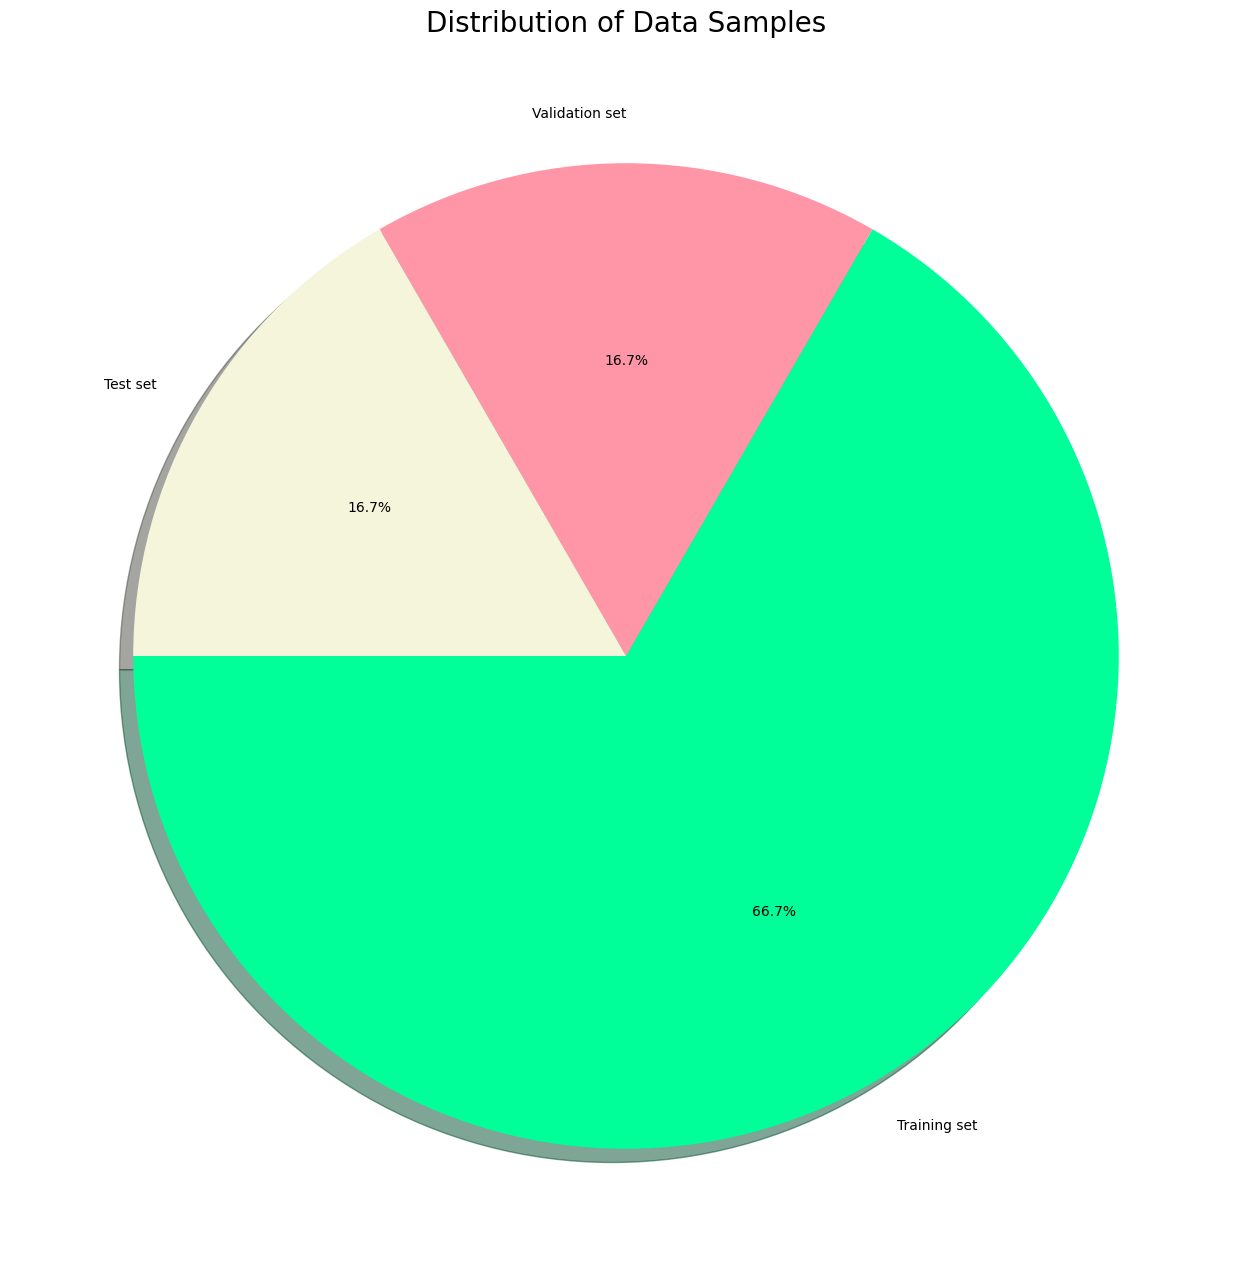

In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ['Training set', 'Validation set', 'Test set']

# Get the number of samples in each set
labels_count = [len(train_set), len(val_set), len(test_set)]

# Create the pie chart
plt.figure(figsize=(16, 16))
plt.pie(labels_count, labels=class_names, startangle=180,
        autopct='%1.1f%%', colors=['#00ff99', '#FF96A7',"beige"], shadow=True)
plt.title('Distribution of Data Samples', fontsize=20)
plt.show()

In [20]:
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']
print(class_names)

['adenocarcinoma', 'benign', 'squamous_carcinoma']


In [11]:
IMAGE_SIZE = [224, 224]

In [163]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [12]:
for layer in vgg.layers:
    layer.trainable = False

NameError: name 'vgg' is not defined

In [29]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation

# Create a sequential model
model = Sequential()

# First convolutional layer with 6 filters, kernel size 5x5, and tanh activation
model.add(Conv2D(6, (5, 5), input_shape=(32, 32, 3), activation='tanh'))

# First pooling layer (average pooling, 2x2 window)
model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

# Second convolutional layer with 16 filters and tanh activation
model.add(Conv2D(16, (5, 5), activation='tanh'))

# Second pooling layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

# Flatten the feature maps into a 1D vector
model.add(Flatten())

# Fully connected layer with 120 units and tanh activation
model.add(Dense(120, activation='tanh'))

# Fully connected layer with 84 units
model.add(Dense(84, activation='tanh'))

# Output layer with softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

history= model.fit(
  train_set,
  validation_data=val_set,
  epochs=50,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_8 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [24]:
# tell the model what cost and optimization method to use
model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
history= model.fit(
  train_set,
  validation_data=val_set,
  epochs=50,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)

Epoch 1/50


KeyboardInterrupt: 

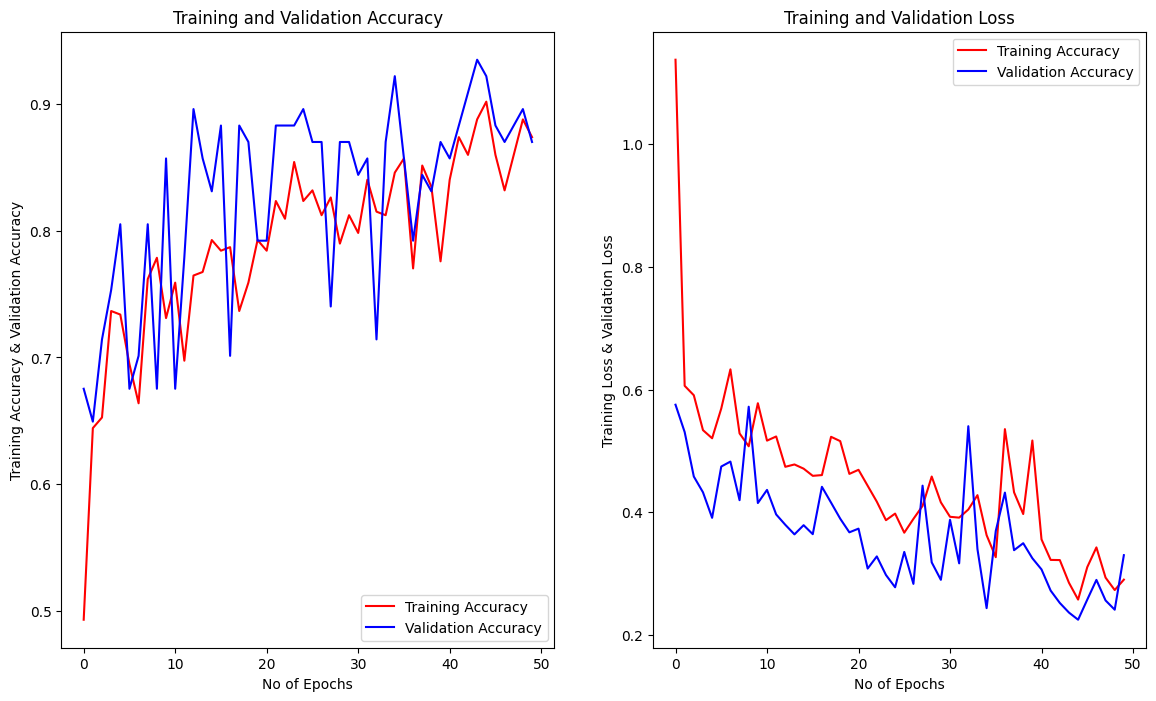

In [30]:
# Extract the metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the results
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy',color='red')
plt.plot(range(len(acc)), val_acc, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Accuracy',color='red')
plt.plot(range(len(val_loss)), val_loss, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
loss,accuracy=model.evaluate(train_set)
accuracy*100

12/12 [==============================] - 2s 35ms/step - loss: 0.3480 - accuracy: 0.8347


83.47339034080505

In [33]:
val_loss,val_accuracy=model.evaluate(val_set)
val_accuracy*100

3/3 [==============================] - 0s 9ms/step - loss: 0.3301 - accuracy: 0.8701


87.01298832893372

In [34]:
test_loss,test_accuracy=model.evaluate(test_set)
test_accuracy*100

3/3 [==============================] - 18s 9ms/step - loss: 0.4393 - accuracy: 0.8158


81.57894611358643

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
actual label: benign
1/1 [==============================] - 0s 130ms/step
predicted label: squamous_carcinoma


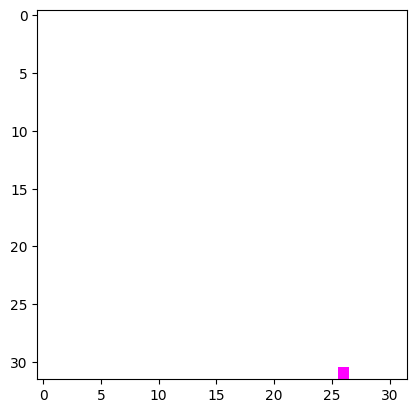

In [36]:
import numpy as np
for images_batch, labels_batch in test_set:

    first_image = images_batch[0]
    first_label = int(labels_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


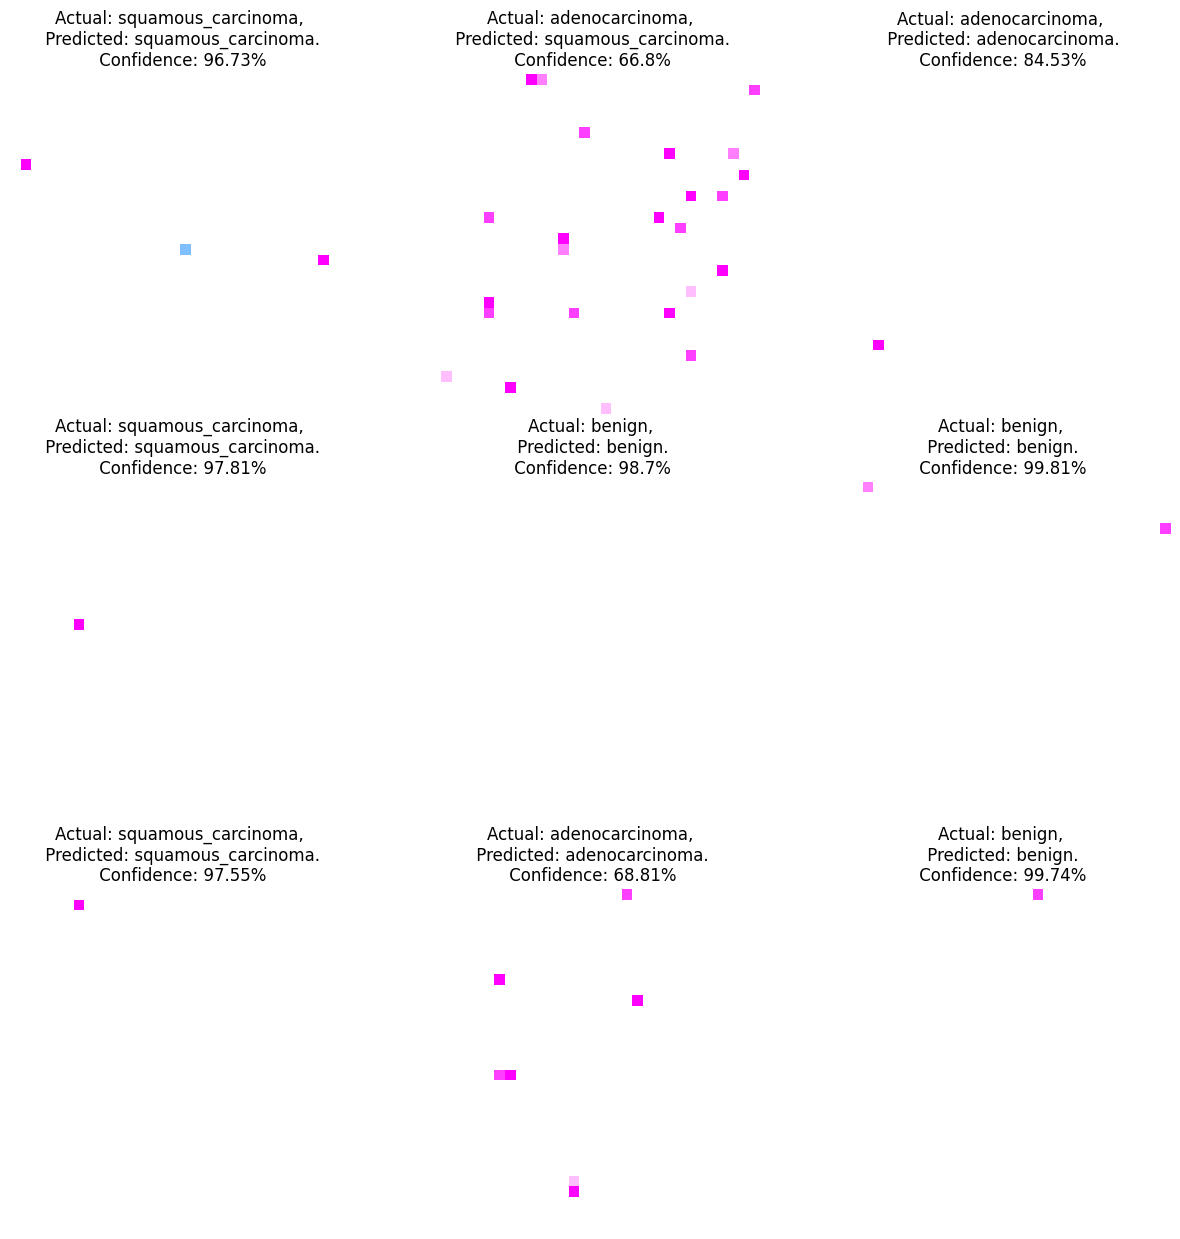

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

Generating predictions...
3/3 [==============================] - 0s 19ms/step
Classification Report:
                    precision    recall  f1-score   support

    adenocarcinoma       1.00      0.48      0.65        25
            benign       1.00      0.96      0.98        25
squamous_carcinoma       0.65      1.00      0.79        26

          accuracy                           0.82        76
         macro avg       0.88      0.81      0.81        76
      weighted avg       0.88      0.82      0.81        76

Generating confusion matrix...


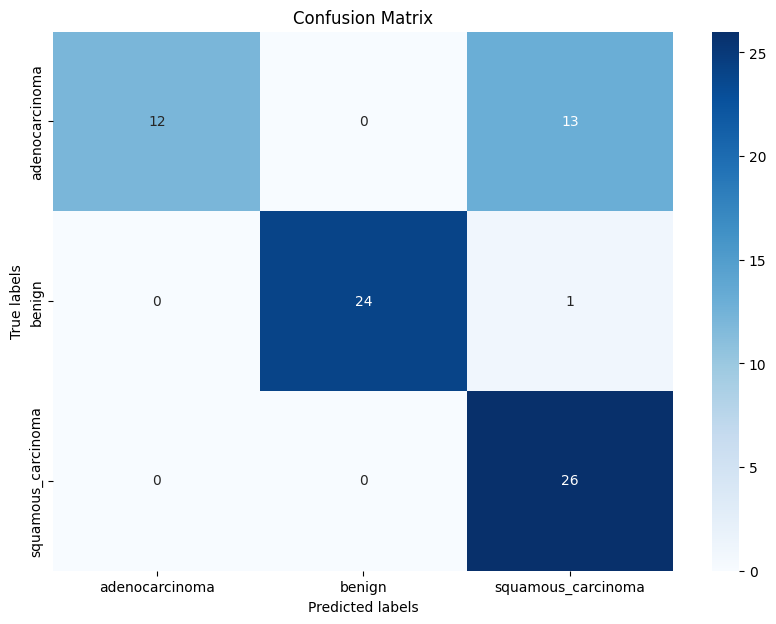

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on a subset of the test set
subset_size = 100  # Adjust the subset size as needed
test_images_subset, test_labels_subset = [], []
for images, labels in test_set:
    if len(test_images_subset) < subset_size:
        test_images_subset.extend(images)
        test_labels_subset.extend(labels)
    else:
        break
test_images_subset = np.array(test_images_subset)
test_labels_subset = np.array(test_labels_subset)

# Generate predictions
print("Generating predictions...")
y_pred_subset = model.predict(test_images_subset)
y_pred_classes_subset = np.argmax(y_pred_subset, axis=1)

# Generate classification report
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']  # Replace with your class names
print("Classification Report:")
print(classification_report(test_labels_subset, y_pred_classes_subset, target_names=class_names))

# Generate confusion matrix
print("Generating confusion matrix...")
cm_subset = confusion_matrix(test_labels_subset, y_pred_classes_subset)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()